# *Ejercicio 2*

Consideremos el siguiente vector de atributos binarios:

                                          (scones, cerveza, whisky, avena, futbol)


El vector **x = (1, 0, 1, 1, 0)** significa que se trata de una persona que le gustan los scones, no toma cerveza, le gusta el whisky y la avena pero no ve futbol.

a) Implementar el clasificador ingenuo de Bayes.

b) Clasificar el ejemplo **x = (1, 0, 1, 1, 0)** determinando si corresponde a las preferencias
de una persona inglesa o escosesa.

In [16]:
from utils.data_loader import load_person_preferences
from bayesian_naive_classifier import bayesian_classifier


titles, training_matrix = load_person_preferences("../data/PreferenciasBritanicos.csv")
print(bayesian_classifier(training_matrix, [[1, 0, 1, 1, 0], [0, 0, 1, 0, 1]], [1, 1, 1, 1, 1]))

['E', 'I']


# *Ejercicio 3*

Clasificador de texto utilizando el clasificador ingenuo de Bayes para el conjunto de datos ”Noticias Argentinas”.

a) Utilizar al menos 4 categor ías. Dividir el conjunto de textos disponible para utilizar una parte de los mismos como conjunto de entrenamiento y otro como conjunto test.

b) Construir la matriz de confusión.

c) Calcular las medidas de evaluación Accuracy, Precision, tasa de verdaderos positivos,
tasa de falsos positivos y F1-score.

d) Calcular la curva ROC.

In [4]:
import numpy as np
from utils.data_loader import load_transformed_news_dataset
from models.news_classifier import NewsClassifier
from sklearn.model_selection import train_test_split

titles, news_data = load_transformed_news_dataset("../data/transformed_news.tsv")
train_matrix = news_data[:, :3]
categories = news_data[:, 3]
training_news, test_news, training_target, test_target = train_test_split(train_matrix, categories, train_size=0.8,
                                                                          stratify=categories)
news_classifier = NewsClassifier()
column = np.transpose
extra_column = training_target.reshape(len(training_target), 1)
training_news = np.append(training_news, extra_column, axis=1)
news_classifier.train(training_news, ignore_words=True)
result, metrics = news_classifier.classify(test_news, test_target, generate_metrics=True, output_path="../output",
                                           use_sources=False, ignore_words=False)
print(metrics.estimated_classifier_error)
print(metrics.estimated_classifier_error_relative)
print(metrics.true_positives_rate)
print(metrics.false_positives_rate)
print(metrics.recall)
print(metrics.accuracy)
print(metrics.precision)
print(metrics.f1_score)
print(metrics.matthews_correlation_coefficient)
print(metrics.roc_point)


85
0.027579493835171966
{'Ciencia y Tecnologia': 0.9948119325551232, 'Deportes': 0.9857328145265889, 'Economia': 0.9662337662337662, 'Internacional': 0.9428571428571428}
{'Ciencia y Tecnologia': 0.010817827780181739, 'Deportes': 0.005192557334487235, 'Economia': 0.013408304498269897, 'Internacional': 0.007352941176470588}
{'Ciencia y Tecnologia': 0.9948119325551232, 'Deportes': 0.9857328145265889, 'Economia': 0.9662337662337662, 'Internacional': 0.9428571428571428}
{'Ciencia y Tecnologia': 0.990590525632706, 'Deportes': 0.9925373134328358, 'Economia': 0.981505515898767, 'Internacional': 0.9802076573653472}
{'Ciencia y Tecnologia': 0.9684343434343434, 'Deportes': 0.9844559585492227, 'Economia': 0.96, 'Internacional': 0.9771197846567967}
{'Ciencia y Tecnologia': 0.9814459373000639, 'Deportes': 0.9850939727802981, 'Economia': 0.9631067961165048, 'Internacional': 0.9596827495042961}
{'Ciencia y Tecnologia': (0.010817827780181739, 0.9948119325551232), 'Deportes': (0.005192557334487235, 0.98

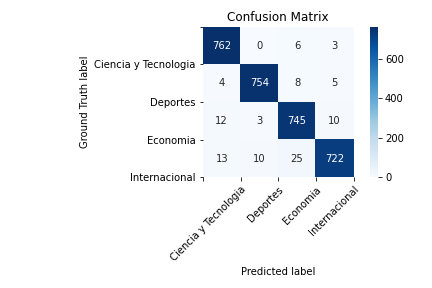


# *Ejercicio 4*
El conjunto de datos **binary.csv** contiene información de la admisión de estudiantes a una universidad.

Las variables son:

*   *admit*: toma valores 0: no fue admitido, 1 fue admitido
*   *GRE (Graduate Record Exam scores)*: variable numérica
*   *GPA (Grade Point Average)*: variable numérica
*   *rank*: variable categórica que se refiere al prestigio de la escuela secundaria a la que el alumno asistió y toma valores {1, 2, 3, 4}.

Un investigador está interesado en averiguar cómo influyen estas variables en la admisión. Discretiza las variables GRE y GPA de la siguiente manera GRE ∈ {GRE ≥ 500,GRE < 500} y GPA ∈ {GPA ≥ 3,GPA < 3}. Sabe que estas variables cumplen las relaciones presentadas en la *Figura 1*.

*Figura 1*: Relaciones entre las variables


a) Calcular la probabilidad de que una persona que proviene de una escuela con rango 1 no haya sido admitida en la universidad.

b) Calcular la probabilidad de que una persona que fue a una escuela de rango 2, tenga GRE = 450 y GPA = 3.5 sea admitida en la universidad.

c) En este ejercicio, ¿cuál es el proceso de aprendizaje?

In [11]:
from models.bayesian_network import BayesianNetwork
from utils.data_loader import load_news_dataset, load_transformed_news_dataset, load_binary_dataset, discretize_binary_dataset

titles, matrix = load_binary_dataset("../data/binary.csv")
matrix = discretize_binary_dataset(titles, matrix)
# print(titles)
data_relations = [["rank", ["admit", "gre", "gpa"], [1, 2, 3, 4]], ["gpa", ["admit"], [0, 1]],
                  ["gre", ["admit"], [0, 1]], ["admit", [], [0, 1]]]
bayesian_network = BayesianNetwork(data_relations, matrix, titles)

probability = bayesian_network.calculate_total_generic_condicional_probability(["rank", "admit"], [1, 1], ["rank"], [1])
print(probability)
probability = bayesian_network.calculate_total_generic_condicional_probability(["rank", "gre", "gpa", "admit"],
                                                                               [2, 0, 1, 1], ["rank", "gre", "gpa"],
                                                                               [2, 0, 1])
print(probability)


0.5517631529323024
0.2173913043478261
0.9585140486517064
